### 1. Import libraries

In [118]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.simplefilter('ignore')

### 2. Load data

In [42]:
#load the dataframe with training data
df_training = pd.read_csv('2021-01-21_zeta-disease_training-data_dsi-take-home-challenge.csv')
df_training.head()

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
0,54,189,27.1,80,0,1.5038,0,10,0
1,23,150,38.5,68,71,0.3868,55,2,0
2,47,186,29.9,90,0,0.2728,0,7,0
3,18,150,30.8,70,1033,0.6598,56,0,0
4,24,160,32.4,74,125,0.7608,59,2,0


In [142]:
df_test = pd.read_csv('2021-01-21_zeta-disease_prediction-data_dsi-take-home-challenge.csv')
df_test.head()

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
0,24,151,39.5,69,72,1.3968,56,4,NaN
1,27,179,35.5,89,156,1.6608,43,6,NaN
2,34,147,26.9,76,74,1.6958,53,2,NaN
3,35,206,32.4,73,127,1.4608,61,6,NaN
4,60,193,29.8,62,192,1.7798,65,9,NaN


### 3. Data Summarization

In [110]:
#This is to check the data type of each attribute/column
df_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 800 non-null    int64  
 1   weight              800 non-null    int64  
 2   bmi                 800 non-null    float64
 3   blood_pressure      800 non-null    int64  
 4   insulin_test        800 non-null    int64  
 5   liver_stress_test   800 non-null    float64
 6   cardio_stress_test  800 non-null    int64  
 7   years_smoking       800 non-null    int64  
 8   zeta_disease        800 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 56.4 KB


In [143]:
#This is to check the data type of each attribute/column
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 20 non-null     int64  
 1   weight              20 non-null     int64  
 2   bmi                 20 non-null     float64
 3   blood_pressure      20 non-null     int64  
 4   insulin_test        20 non-null     int64  
 5   liver_stress_test   20 non-null     float64
 6   cardio_stress_test  20 non-null     int64  
 7   years_smoking       20 non-null     int64  
 8   zeta_disease        0 non-null      float64
dtypes: float64(3), int64(6)
memory usage: 1.5 KB


In [111]:
#800 rows and 9 columns
df_training.shape

(800, 9)

In [144]:
# 20 rows and 9 columns
df_test.shape

(20, 9)

In [112]:
#checking for null values in the training dataframe
df_training.isna().sum()

age                   0
weight                0
bmi                   0
blood_pressure        0
insulin_test          0
liver_stress_test     0
cardio_stress_test    0
years_smoking         0
zeta_disease          0
dtype: int64

In [145]:
#checking for null values in the test dataframe
df_test.isna().sum()

age                    0
weight                 0
bmi                    0
blood_pressure         0
insulin_test           0
liver_stress_test      0
cardio_stress_test     0
years_smoking          0
zeta_disease          20
dtype: int64

In [113]:
#Display the top 5 rows of dataframe
df_training.head()

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
0,54,189,27.1,80,0,1.5038,0,10,0
1,23,150,38.5,68,71,0.3868,55,2,0
2,47,186,29.9,90,0,0.2728,0,7,0
3,18,150,30.8,70,1033,0.6598,56,0,0
4,24,160,32.4,74,125,0.7608,59,2,0


In [114]:
df_training.describe()

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,30.985000,172.407500,32.201625,69.565000,85.887500,0.544496,43.121250,4.051250,0.348750
std,13.824025,31.942438,8.549155,19.874784,126.333656,0.348711,30.409949,4.176173,0.476873
min,18.000000,94.000000,0.000000,0.000000,0.000000,0.140800,0.000000,0.000000,0.000000
25%,21.000000,149.000000,27.300000,62.000000,0.000000,0.307800,0.000000,1.000000,0.000000
50%,26.000000,167.000000,32.050000,72.000000,45.000000,0.445300,53.000000,3.000000,0.000000
75%,38.000000,192.000000,36.525000,80.000000,130.000000,0.699800,62.000000,6.000000,1.000000
max,109.000000,308.000000,86.100000,157.000000,1077.000000,3.481300,214.000000,40.000000,1.000000


### 4. Class Distribution

In [115]:
#Class distribution
df_training['zeta_disease'].value_counts()
#class 0 corresponds to no zeta_disease
#class 1 corresponds to yes zeta_disease
#There are nearly double the number of observations with class 0 than class 1

0    521
1    279
Name: zeta_disease, dtype: int64

### 5. Data Visualization

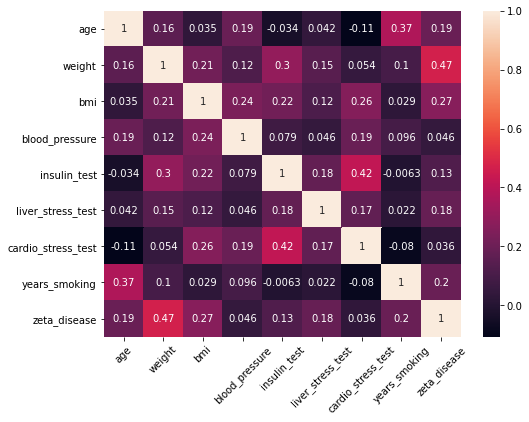

In [55]:
#Correlation between attributes
#Drawing heat map .Heatmap is used to calculate the correlation between numeric columns in the form of matrix.
#correlation lies between -1 and 1. 
#Full negative correlation is -1. 
#Full positive correlation is 1 and 
# value of 0 indicates no correlation at all

plt.figure(figsize=(8,6))
sns.heatmap(df_training.corr(), annot=True)
#rotate the x label with the help of matplotlib
plt.xticks(rotation=45);

In [50]:
df_training.corr()

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
age,1.000000,0.157705,0.035347,0.193066,-0.034294,0.042416,-0.106039,0.372373,0.192925
weight,0.157705,1.000000,0.214262,0.122349,0.304295,0.146779,0.053629,0.100834,0.471155
bmi,0.035347,0.214262,1.000000,0.240513,0.217265,0.116649,0.264861,0.028683,0.271856
blood_pressure,0.193066,0.122349,0.240513,1.000000,0.079425,0.045764,0.193221,0.095613,0.045739
insulin_test,-0.034294,0.304295,0.217265,0.079425,1.000000,0.175230,0.417894,-0.006292,0.126504
liver_stress_test,0.042416,0.146779,0.116649,0.045764,0.175230,1.000000,0.172048,0.021817,0.184738
cardio_stress_test,-0.106039,0.053629,0.264861,0.193221,0.417894,0.172048,1.000000,-0.080358,0.036090
years_smoking,0.372373,0.100834,0.028683,0.095613,-0.006292,0.021817,-0.080358,1.000000,0.195261
zeta_disease,0.192925,0.471155,0.271856,0.045739,0.126504,0.184738,0.036090,0.195261,1.000000


In [51]:
#Skew refers to a distribution that is assumed Gaussian (normal or bell curve) that is shifted or squashed in one direction or another. 
#Many machine learning algorithms assume a Gaussian distribution. 
df_training.skew() #values closer to 0 show less skew.

age                   2.031742
weight                0.734588
bmi                   0.605968
blood_pressure       -1.357085
insulin_test          2.827382
liver_stress_test     2.330998
cardio_stress_test    0.148022
years_smoking         3.037747
zeta_disease          0.635931
dtype: float64

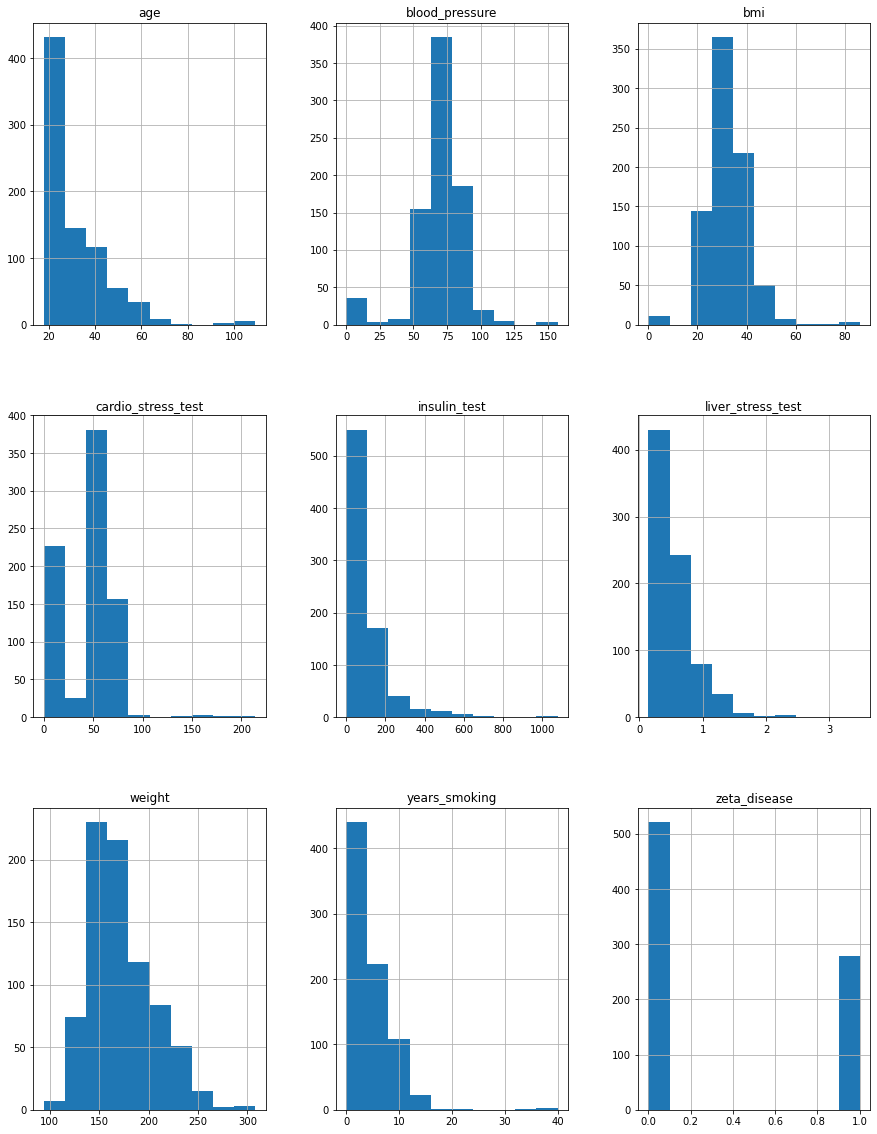

In [52]:
#Understanding the data using visualization

## Univariate plots
#1.Histogram
fig = plt.figure(figsize=(15,20))
ax = fig.gca()
df_training.hist(ax=ax)
plt.show();

# age, insulin_test,liver_stress_test, years_smoking follows exponential distribution
# blood_pressure, bmi, weight follow nearly Gaussian distribution

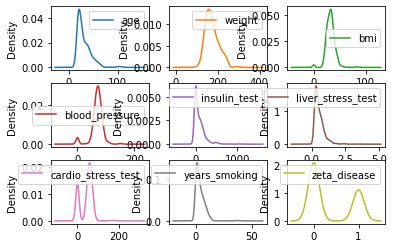

In [92]:
#2. Density plot shows distribution of each attribute
df_training.plot(kind='density', subplots=True, layout=(3,3), sharex=False) 
plt.show()

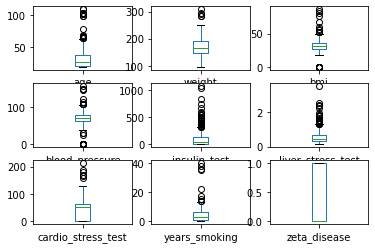

In [93]:
#Box and Whisker plot 
#This plot tells if there are any outliers in the dataset
df_training.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False) 
plt.show()

### 6. Standardize Data

In [100]:
X = df_training.drop(['zeta_disease'], axis=1)
y = df_training['zeta_disease']
X.head(2)

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking
0,54,189,27.1,80,0,1.5038,0,10
1,23,150,38.5,68,71,0.3868,55,2


In [96]:
scaler = StandardScaler().fit(X)
rescaled_X = scaler.transform(X)
print(rescaled_X[0:5,:])

[[ 1.66589677  0.51977498 -0.5971136   0.52536561 -0.68027185  2.75272183
  -1.41888518  1.42534108]
 [-0.57797896 -0.70193508  0.73718577 -0.07879226 -0.11791643 -0.45250726
   0.39086488 -0.4914866 ]
 [ 1.15921516  0.42579728 -0.26939095  1.0288305  -0.68027185 -0.77963001
  -1.41888518  0.7065307 ]
 [-0.9398944  -0.70193508 -0.16405152  0.02190072  7.50160355  0.33086566
   0.42376943 -0.97069352]
 [-0.50559587 -0.38867609  0.02321856  0.22328668  0.30979051  0.62068494
   0.52248307 -0.4914866 ]]


### 7. Feature Selection

In [106]:
#Feature selection before modelling the data helps in 
#reducing the overfitting,improve accuracy and reduce training time.
# feature extraction
best_5_features = SelectKBest(score_func=f_classif, k=5) # best 5 features
fit = best_5_features.fit(X, y)
print(fit.scores_)
features = fit.transform(X)
# summarize selected features
print(features[0:5,:])

#age,weight,bmi,liver_stress_test,years_smoking are best 5 features

[ 30.84989834 227.68951591  63.68328684   1.67292644  12.9783547
  28.19643166   1.04075179  31.63117365]
[[ 54.     189.      27.1      1.5038  10.    ]
 [ 23.     150.      38.5      0.3868   2.    ]
 [ 47.     186.      29.9      0.2728   7.    ]
 [ 18.     150.      30.8      0.6598   0.    ]
 [ 24.     160.      32.4      0.7608   2.    ]]


In [107]:
# feature extraction
lr_model = LogisticRegression(solver='liblinear')
rfe = RFE(lr_model, 5)
fit = rfe.fit(X, y)
print(f'Number of Features:{fit.n_features_}')
print(f'Selected Features:{fit.support_}')
print(f'Feature Ranking: {fit.ranking_}')

#best 5 features are
#weight,bmi, blood_pressure,liver_stress_test,years_smoking

Number of Features:5
Selected Features:[False  True  True  True False  True False  True]
Feature Ranking: [2 1 1 1 4 1 3 1]


In [109]:
# feature extraction
model = ExtraTreesClassifier(n_estimators=100) # no of trees
model.fit(X, y)
print(model.feature_importances_)

#weight,age,blood_pressure,liver_stress_test,years_smoking

[0.1447636  0.23345358 0.14082214 0.09607322 0.08155687 0.11847387
 0.07644654 0.10841018]


,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking
0,54,189,27.1,80,0,1.5038,0,10
1,23,150,38.5,68,71,0.3868,55,2


In [119]:
# we are taking all attributes as feature importance covers most of the algorithms
X = df_training.drop(['zeta_disease'], axis=1)
y = df_training['zeta_disease']
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.20, random_state=1, shuffle=True)

In [127]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', DecisionTreeClassifier()))
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.764062 (0.048134)
KNN: 0.712500 (0.064877)
DT: 0.689063 (0.070728)
RF: 0.668750 (0.057111)


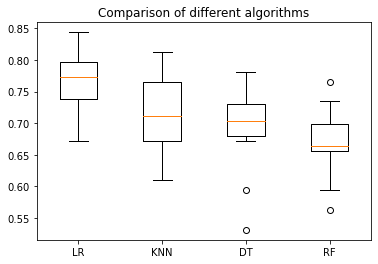

In [129]:
plt.boxplot(results, labels=names)
plt.title('Comparison of different algorithms')
plt.show()

#Logistic Regression and KNN gives better perfomance. The models can still be improved by hyper parameter tuning.

### 8. Make Prediction

In [150]:
df_test = pd.read_csv('2021-01-21_zeta-disease_prediction-data_dsi-take-home-challenge.csv')
df_test.head()

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
0,24,151,39.5,69,72,1.3968,56,4,NaN
1,27,179,35.5,89,156,1.6608,43,6,NaN
2,34,147,26.9,76,74,1.6958,53,2,NaN
3,35,206,32.4,73,127,1.4608,61,6,NaN
4,60,193,29.8,62,192,1.7798,65,9,NaN


In [151]:
#Logistic Regression & KNN gives better model based on above score.

In [153]:
f_test_no_zeta_disease = df_test.drop(['zeta_disease'], axis=1)
lr_model = LogisticRegression(solver='liblinear')
lr_model.fit(X_train, y_train)
test_predictions = lr_model.predict(df_test_no_zeta_disease)
test_predictions

array([0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0])

In [154]:
df_test ['zeta_disease'] = test_predictions
df_test

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
0,24,151,39.5,69,72,1.3968,56,4,0
1,27,179,35.5,89,156,1.6608,43,6,1
2,34,147,26.9,76,74,1.6958,53,2,0
3,35,206,32.4,73,127,1.4608,61,6,1
4,60,193,29.8,62,192,1.7798,65,9,1
5,45,120,36.5,108,50,1.2978,54,12,0
6,20,139,38.2,61,77,1.5818,68,3,0
7,23,137,31.2,70,73,1.4168,59,7,0
8,36,195,30.5,59,141,1.4498,59,6,1
9,19,193,25.8,84,66,1.7938,50,3,0


In [155]:
#using KNN classifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
test_predictions_knn = knn_model.predict(df_test_no_zeta_disease)
test_predictions_knn

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1])

In [149]:
df_test ['zeta_disease'] = test_predictions_knn
df_test

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
0,24,151,39.5,69,72,1.3968,56,4,0
1,27,179,35.5,89,156,1.6608,43,6,0
2,34,147,26.9,76,74,1.6958,53,2,0
3,35,206,32.4,73,127,1.4608,61,6,1
4,60,193,29.8,62,192,1.7798,65,9,1
5,45,120,36.5,108,50,1.2978,54,12,0
6,20,139,38.2,61,77,1.5818,68,3,0
7,23,137,31.2,70,73,1.4168,59,7,0
8,36,195,30.5,59,141,1.4498,59,6,1
9,19,193,25.8,84,66,1.7938,50,3,0
